**Project Name:** 2018 Turkish Parliamentary Election Results' Relationship with Interconnectedness of Deputy Characteristics and City Demographics

**Group Members:**


*   Omay Ece Ayyıldız
*   Ali Güzel
*   Berkant Kartop
* Nazlıcan Turan
* Hasan Kadir Uçmazoğlu
* Elif Yıldırır




In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics.pairwise import pairwise_distances

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


###1. Deputies-Cities Analysis

In [ ]:
df_m = pd.read_csv('/content/drive/MyDrive/48002_proj/milletvekilleri_backup.xlsx')
df_m.columns.values[0] = 'Ad Soyad'
df_m

,Ad Soyad,Şehir,Parti,Meslek,Doğum Yeri,Doğum Yılı
0,Abdullah DOĞRU,Adana,AK Parti,mühendis,Malatya,1965.0
1,Ahmet ZENBİLCİ,Adana,AK Parti,kamu yöneticisi,Kozan,1966.0
2,Ayhan BARUT,Adana,CHP,mühendis,Adana,1964.0
3,Ayşe Sibel ERSOY,Adana,MHP,eczacı,Adana,1964.0
4,Burhanettin BULUT,Adana,CHP,eczacı,Bitlis,1964.0
...,...,...,...,...,...,...
656,Ahmet ÇOLAKOĞLU,Zonguldak,AK Parti,yönetici,Zonguldak,1978.0
657,Deniz YAVUZYILMAZ,Zonguldak,CHP,mühendis,Zonguldak,1979.0
658,Hamdi UÇAR,Zonguldak,AK Parti,işletmeci,Zonguldak,1963.0
659,Polat TÜRKMEN,Zonguldak,AK Parti,mühendis,Trabzon,1957.0


In [ ]:
df_m.dtypes

Ad Soyad      object
Şehir         object
Parti         object
Meslek        object
Doğum Yeri    object
Doğum Yılı    object
dtype: object

Since all data types are objects, we need to do some alterations to the dataset after some exploratory analysis.

In [ ]:
df_m.shape

(661, 6)

In [ ]:
#MOSTS OF THE PARLIEMENT
print("Meslek: ", df_m.Meslek.value_counts()[:5].index.tolist())
print("Doğum Yeri: ",df_m['Doğum Yeri'].value_counts()[:5].index.tolist())
print("Parti: ", df_m['Parti'].value_counts()[:5].index.tolist())

Meslek:  ['avukat', 'mühendis', 'doktor', 'iş adamı', 'yönetici']
Doğum Yeri:  ['İstanbul', 'Ankara', 'Malatya', 'Sivas', 'Şanlıurfa']
Parti:  ['AK Parti', 'CHP', 'HDP', 'MHP', 'İYİ Parti']


In [ ]:
#DEPUTY PROFESSIONS OF PARTIES
print("AKP: ", df_m.loc[df_m['Parti'] == 'AK Parti'].Meslek.value_counts()[:5].index.tolist())
print("CHP: ", df_m.loc[df_m['Parti'] == 'CHP'].Meslek.value_counts()[:5].index.tolist())
print("MHP: ", df_m.loc[df_m['Parti'] == 'MHP'].Meslek.value_counts()[:5].index.tolist())
print("İYİ Parti: ", df_m.loc[df_m['Parti'] == 'İYİ Parti'].Meslek.value_counts()[:5].index.tolist())

AKP:  ['avukat', 'mühendis', 'yönetici', 'hukukçu', 'iş adamı']
CHP:  ['avukat', 'mühendis', 'iş adamı', 'doktor', 'ekonomist']
MHP:  ['mühendis', 'avukat', 'öğretmen', 'eczacı', 'eğitimci']
İYİ Parti:  ['mühendis', 'yönetici', 'doktor', 'avukat', 'akademisyen']


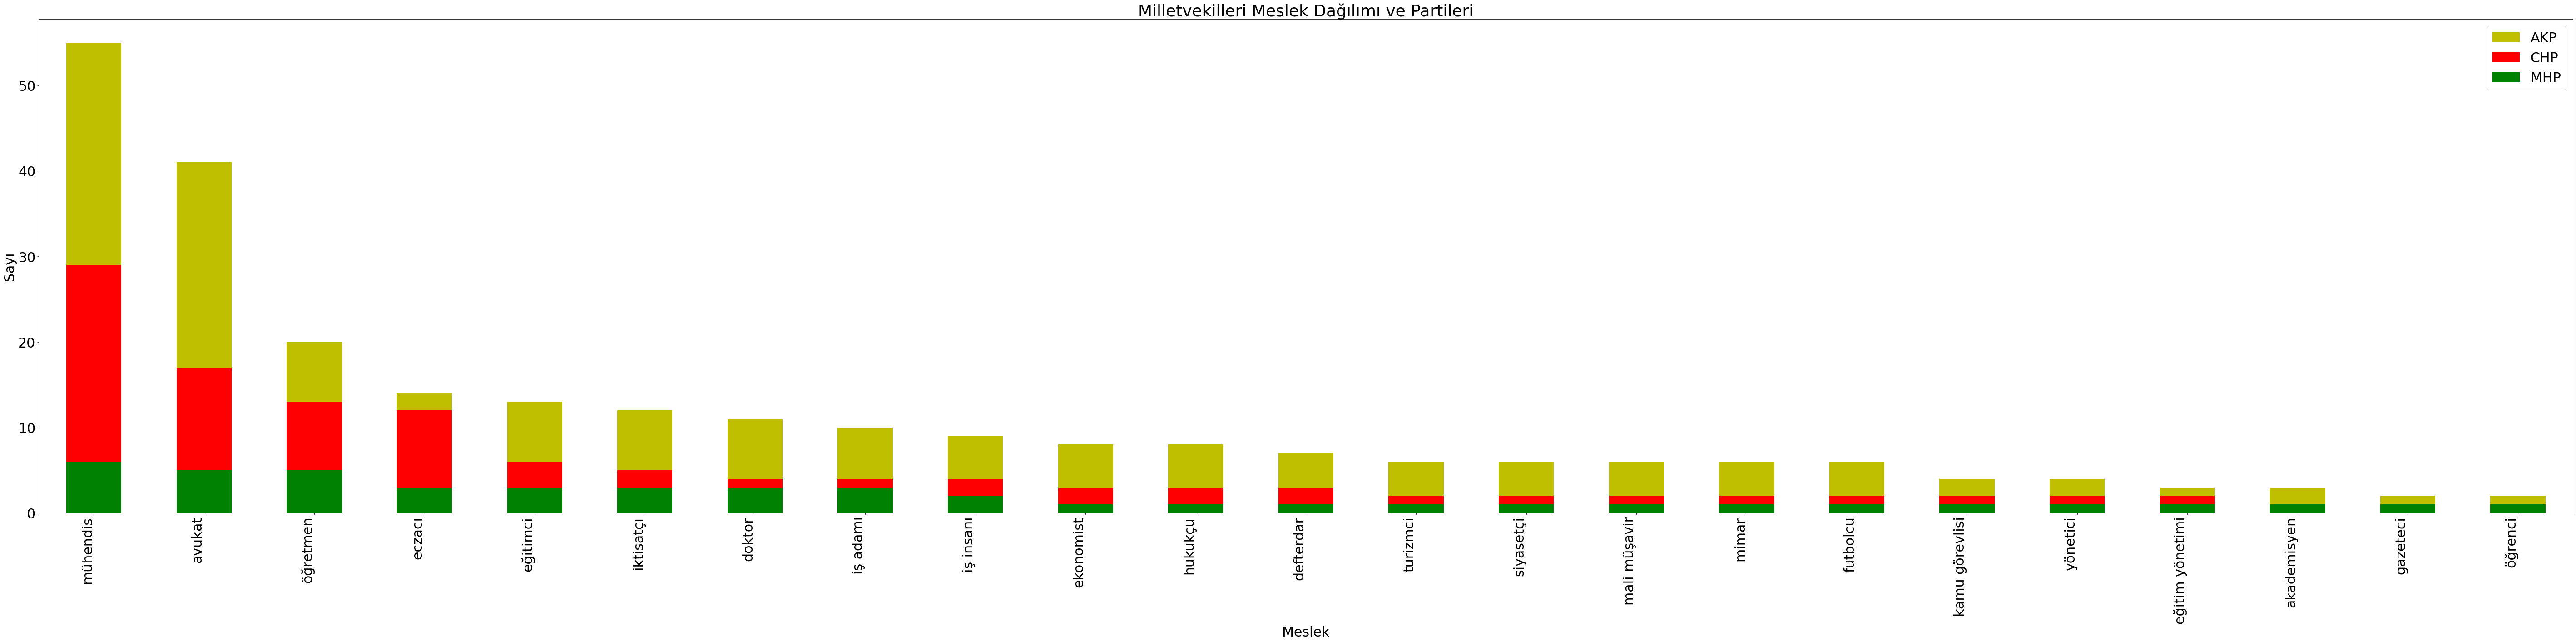

In [ ]:
#PLOT OF SUCH DISTRIBUTIONS
plt.figure(figsize=(100,20))
plt.rcParams.update({'font.size': 30})
plt.xticks(rotation = 45, ha = 'right')
df_m.loc[df_m['Parti'] == 'AK Parti'].Meslek.value_counts().plot(kind='bar', color = 'y', width = 0.5)
df_m.loc[df_m['Parti'] == 'CHP'].Meslek.value_counts().plot(kind='bar', color = 'r', width = 0.5)
df_m.loc[df_m['Parti'] == 'MHP'].Meslek.value_counts().plot(kind='bar', color = 'g', width = 0.5)
plt.title('Milletvekilleri Meslek Dağılımı ve Partileri')
plt.ylabel('Sayı')
plt.xlabel('Meslek')
plt.legend(['AKP', 'CHP', 'MHP'])

Detecting whether the deputies were born in the city they have been elected.

In [ ]:
df_m['farkli_sehir'] = df_m['Doğum Yeri'].ne(df_m['Şehir'])
df_m

,Ad Soyad,Şehir,Parti,Meslek,Doğum Yeri,Doğum Yılı,farkli_sehir
0,Abdullah DOĞRU,Adana,AK Parti,mühendis,Malatya,1965.0,True
1,Ahmet ZENBİLCİ,Adana,AK Parti,kamu yöneticisi,Kozan,1966.0,True
2,Ayhan BARUT,Adana,CHP,mühendis,Adana,1964.0,False
3,Ayşe Sibel ERSOY,Adana,MHP,eczacı,Adana,1964.0,False
4,Burhanettin BULUT,Adana,CHP,eczacı,Bitlis,1964.0,True
...,...,...,...,...,...,...,...
656,Ahmet ÇOLAKOĞLU,Zonguldak,AK Parti,yönetici,Zonguldak,1978.0,False
657,Deniz YAVUZYILMAZ,Zonguldak,CHP,mühendis,Zonguldak,1979.0,False
658,Hamdi UÇAR,Zonguldak,AK Parti,işletmeci,Zonguldak,1963.0,False
659,Polat TÜRKMEN,Zonguldak,AK Parti,mühendis,Trabzon,1957.0,True


In [ ]:
#ONE HOT ENCODING on PROFESSION FEATURE
y = pd.get_dummies(df_m.Meslek, prefix='Meslek')
df_encoded = df_m.join(y)
df_encoded

,Ad Soyad,Şehir,Parti,Meslek,Doğum Yeri,Doğum Yılı,farkli_sehir,Meslek_Eğitimci-Ekonomis,Meslek_akademisyen,Meslek_araştırmacı,...,Meslek_vali,Meslek_veteriner,Meslek_yatırım danışmanı,Meslek_yayın yönetmeni,Meslek_yazar,Meslek_yönetici,Meslek_yönetmen,Meslek_öğrenci,Meslek_öğretim üyesi,Meslek_öğretmen
0,Abdullah DOĞRU,Adana,AK Parti,mühendis,Malatya,1965.0,True,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Ahmet ZENBİLCİ,Adana,AK Parti,kamu yöneticisi,Kozan,1966.0,True,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Ayhan BARUT,Adana,CHP,mühendis,Adana,1964.0,False,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Ayşe Sibel ERSOY,Adana,MHP,eczacı,Adana,1964.0,False,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Burhanettin BULUT,Adana,CHP,eczacı,Bitlis,1964.0,True,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
656,Ahmet ÇOLAKOĞLU,Zonguldak,AK Parti,yönetici,Zonguldak,1978.0,False,0,0,0,...,0,0,0,0,0,1,0,0,0,0
657,Deniz YAVUZYILMAZ,Zonguldak,CHP,mühendis,Zonguldak,1979.0,False,0,0,0,...,0,0,0,0,0,0,0,0,0,0
658,Hamdi UÇAR,Zonguldak,AK Parti,işletmeci,Zonguldak,1963.0,False,0,0,0,...,0,0,0,0,0,0,0,0,0,0
659,Polat TÜRKMEN,Zonguldak,AK Parti,mühendis,Trabzon,1957.0,True,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#BINARIZING DIFFERENT CITY FEATURE
z = pd.get_dummies(df_m.farkli_sehir, prefix='farkli_sehir')
df_encoded = df_encoded.join(z)
df_encoded

,Ad Soyad,Şehir,Parti,Meslek,Doğum Yeri,Doğum Yılı,farkli_sehir,Meslek_Eğitimci-Ekonomis,Meslek_akademisyen,Meslek_araştırmacı,...,Meslek_yatırım danışmanı,Meslek_yayın yönetmeni,Meslek_yazar,Meslek_yönetici,Meslek_yönetmen,Meslek_öğrenci,Meslek_öğretim üyesi,Meslek_öğretmen,farkli_sehir_False,farkli_sehir_True
0,Abdullah DOĞRU,Adana,AK Parti,mühendis,Malatya,1965.0,True,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,Ahmet ZENBİLCİ,Adana,AK Parti,kamu yöneticisi,Kozan,1966.0,True,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,Ayhan BARUT,Adana,CHP,mühendis,Adana,1964.0,False,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,Ayşe Sibel ERSOY,Adana,MHP,eczacı,Adana,1964.0,False,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,Burhanettin BULUT,Adana,CHP,eczacı,Bitlis,1964.0,True,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
656,Ahmet ÇOLAKOĞLU,Zonguldak,AK Parti,yönetici,Zonguldak,1978.0,False,0,0,0,...,0,0,0,1,0,0,0,0,1,0
657,Deniz YAVUZYILMAZ,Zonguldak,CHP,mühendis,Zonguldak,1979.0,False,0,0,0,...,0,0,0,0,0,0,0,0,1,0
658,Hamdi UÇAR,Zonguldak,AK Parti,işletmeci,Zonguldak,1963.0,False,0,0,0,...,0,0,0,0,0,0,0,0,1,0
659,Polat TÜRKMEN,Zonguldak,AK Parti,mühendis,Trabzon,1957.0,True,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
df_encoded.dtypes

Ad Soyad                object
Şehir                   object
Parti                   object
Meslek                  object
Doğum Yeri              object
                         ...  
Meslek_öğrenci           uint8
Meslek_öğretim üyesi     uint8
Meslek_öğretmen          uint8
farkli_sehir_False       uint8
farkli_sehir_True        uint8
Length: 91, dtype: object

In [ ]:
#DROP OBJECTS TO WORK WITH ENCODED FEATURES
df_encoded= df_encoded.drop(['Meslek', 'Şehir', 'Parti', 'Doğum Yeri', 'Ad Soyad', 'farkli_sehir'], axis=1)

In [ ]:
df_encoded= df_encoded.drop(['Doğum Yılı'], axis = 1)

In [ ]:
df_encoded

,Meslek_Eğitimci-Ekonomis,Meslek_akademisyen,Meslek_araştırmacı,Meslek_astsubay,Meslek_avuakt,Meslek_avukat,Meslek_bankacı,Meslek_bürokrat,Meslek_büyükelçi,Meslek_cerrah,...,Meslek_yatırım danışmanı,Meslek_yayın yönetmeni,Meslek_yazar,Meslek_yönetici,Meslek_yönetmen,Meslek_öğrenci,Meslek_öğretim üyesi,Meslek_öğretmen,farkli_sehir_False,farkli_sehir_True
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
656,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
657,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
658,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
659,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


Creating the graph according to cosine similarity. 

(We selected such method since it enables us to see each deputy/city's similarity with each other according to given features.)

In [ ]:
cosine_sim  = df_encoded


In [ ]:
cos_array_m= pairwise_distances(cosine_sim,metric='cosine')

In [ ]:
graph_m = nx.from_numpy_array(cos_array_m)
nx.write_gexf(graph_m, '/content/drive/MyDrive/cs48002/milletv_n.gexf')

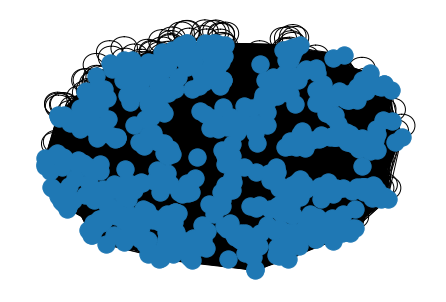

In [ ]:

nx.draw(graph_m)
plt.show()

Since there are so many unique professions (82 columns for proffesions), we  use the categorized dataset that we have created.


1.   iş insanı = (sanayici-işletmeci-iş adamı-esnaf -tüccar - serbest meslek- etc)
2.   YB = (yönetici - iktisat)
3. BPK = (bürokrat - politikacı - kamu görevlisi - mali müşavir)
4. H = (hukuk)
5. TSB = (tıp, sağlık bilimleri)
6. SB = (sosyal bilimler)
7. MBD = (mühendislik, doğa bilimleri)


In [ ]:
#read_file2 = pd.read_excel (r'/content/drive/MyDrive/48002_proj/Extracted_27.Dönem_Milletvekilleri.xlsx')
#read_file2.to_csv (r'//content/drive/MyDrive/48002_proj/Extracted_27.Dönem_Milletvekilleri.xlsx', index = None, header=True)

In [ ]:
df_2 = pd.read_csv('/content/drive/MyDrive/48002_proj/Extracted_27.Dönem_Milletvekilleri.xlsx')
df_2.columns.values[0] = 'Ad Soyad'
df_2.columns = df_2.iloc[0]
df_2 = df_2[1:]
df_2.columns.values[0] = 'Ad Soyad'
df_2

,Ad Soyad,Şehir,Parti,Meslek,Doğum Yeri,Doğum Yılı,Kategorik Meslek,NaN,NaN,NaN
1,Abdullah DOĞRU,Adana,AK Parti,mühendis,Malatya,1965.0,MDB,NaN,NaN,NaN
2,Ahmet ZENBİLCİ,Adana,AK Parti,kamu yöneticisi,Kozan,1966.0,YB,NaN,NaN,NaN
3,Ayhan BARUT,Adana,CHP,mühendis,Adana,1964.0,MDB,NaN,NaN,NaN
4,Ayşe Sibel ERSOY,Adana,MHP,eczacı,Adana,1964.0,DSB,NaN,NaN,NaN
5,Burhanettin BULUT,Adana,CHP,eczacı,Bitlis,1964.0,TSB,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
657,Ahmet ÇOLAKOĞLU,Zonguldak,AK Parti,yönetici,Zonguldak,1978.0,YB,NaN,NaN,NaN
658,Deniz YAVUZYILMAZ,Zonguldak,CHP,mühendis,Zonguldak,1979.0,MDB,NaN,NaN,NaN
659,Hamdi UÇAR,Zonguldak,AK Parti,işletmeci,Zonguldak,1963.0,İş İnsanı,NaN,NaN,NaN
660,Polat TÜRKMEN,Zonguldak,AK Parti,mühendis,Trabzon,1957.0,MDB,NaN,NaN,NaN


In [ ]:
df_m2 = df_2[['Ad Soyad', 'Doğum Yeri', 'Şehir', 'Kategorik Meslek']]
df_m2

,Ad Soyad,Doğum Yeri,Şehir,Kategorik Meslek
1,Abdullah DOĞRU,Malatya,Adana,MDB
2,Ahmet ZENBİLCİ,Kozan,Adana,YB
3,Ayhan BARUT,Adana,Adana,MDB
4,Ayşe Sibel ERSOY,Adana,Adana,DSB
5,Burhanettin BULUT,Bitlis,Adana,TSB
...,...,...,...,...
657,Ahmet ÇOLAKOĞLU,Zonguldak,Zonguldak,YB
658,Deniz YAVUZYILMAZ,Zonguldak,Zonguldak,MDB
659,Hamdi UÇAR,Zonguldak,Zonguldak,İş İnsanı
660,Polat TÜRKMEN,Trabzon,Zonguldak,MDB


In [ ]:
df_m2['farkli_sehir'] = df_m2['Doğum Yeri'].ne(df_m2['Şehir'])
df_m2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Ad Soyad,Doğum Yeri,Şehir,Kategorik Meslek,farkli_sehir
1,Abdullah DOĞRU,Malatya,Adana,MDB,True
2,Ahmet ZENBİLCİ,Kozan,Adana,YB,True
3,Ayhan BARUT,Adana,Adana,MDB,False
4,Ayşe Sibel ERSOY,Adana,Adana,DSB,False
5,Burhanettin BULUT,Bitlis,Adana,TSB,True
...,...,...,...,...,...
657,Ahmet ÇOLAKOĞLU,Zonguldak,Zonguldak,YB,False
658,Deniz YAVUZYILMAZ,Zonguldak,Zonguldak,MDB,False
659,Hamdi UÇAR,Zonguldak,Zonguldak,İş İnsanı,False
660,Polat TÜRKMEN,Trabzon,Zonguldak,MDB,True


In [ ]:
#ONE HOT ENCODİNG
y2 = pd.get_dummies(df_m2['Kategorik Meslek'], prefix='Meslek')
df2_encoded = df_m2.join(y2)

In [ ]:
z2 = pd.get_dummies(df_m2['farkli_sehir'], prefix='FarkliSehir')
df2_encoded = df2_encoded.join(z2)

In [ ]:
df2_encoded

,Ad Soyad,Doğum Yeri,Şehir,Kategorik Meslek,farkli_sehir,Meslek_DSB,Meslek_H,Meslek_MBD,Meslek_MDB,Meslek_SB,Meslek_TSB,Meslek_YB,Meslek_İş İnsanı,FarkliSehir_False,FarkliSehir_True
1,Abdullah DOĞRU,Malatya,Adana,MDB,True,0,0,0,1,0,0,0,0,0,1
2,Ahmet ZENBİLCİ,Kozan,Adana,YB,True,0,0,0,0,0,0,1,0,0,1
3,Ayhan BARUT,Adana,Adana,MDB,False,0,0,0,1,0,0,0,0,1,0
4,Ayşe Sibel ERSOY,Adana,Adana,DSB,False,1,0,0,0,0,0,0,0,1,0
5,Burhanettin BULUT,Bitlis,Adana,TSB,True,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
657,Ahmet ÇOLAKOĞLU,Zonguldak,Zonguldak,YB,False,0,0,0,0,0,0,1,0,1,0
658,Deniz YAVUZYILMAZ,Zonguldak,Zonguldak,MDB,False,0,0,0,1,0,0,0,0,1,0
659,Hamdi UÇAR,Zonguldak,Zonguldak,İş İnsanı,False,0,0,0,0,0,0,0,1,1,0
660,Polat TÜRKMEN,Trabzon,Zonguldak,MDB,True,0,0,0,1,0,0,0,0,0,1


In [ ]:
df2_encoded = df2_encoded.drop(['Ad Soyad', 'Doğum Yeri', 'Kategorik Meslek', 'farkli_sehir'], axis=1)


In [ ]:
df2_encoded

,Şehir,Meslek_DSB,Meslek_H,Meslek_MBD,Meslek_MDB,Meslek_SB,Meslek_TSB,Meslek_YB,Meslek_İş İnsanı,FarkliSehir_False,FarkliSehir_True
1,Adana,0,0,0,1,0,0,0,0,0,1
2,Adana,0,0,0,0,0,0,1,0,0,1
3,Adana,0,0,0,1,0,0,0,0,1,0
4,Adana,1,0,0,0,0,0,0,0,1,0
5,Adana,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
657,Zonguldak,0,0,0,0,0,0,1,0,1,0
658,Zonguldak,0,0,0,1,0,0,0,0,1,0
659,Zonguldak,0,0,0,0,0,0,0,1,1,0
660,Zonguldak,0,0,0,1,0,0,0,0,0,1


In [ ]:
one = df2_encoded.groupby(by=["Şehir"]).sum()
one

,Meslek_DSB,Meslek_H,Meslek_MBD,Meslek_MDB,Meslek_SB,Meslek_TSB,Meslek_YB,Meslek_İş İnsanı,FarkliSehir_False,FarkliSehir_True
Şehir,,,,,,,,,,
Adana,1,1,0,3,6,2,1,1,8,7
Adıyaman,0,4,0,0,0,0,0,1,5,0
Afyonkarahisar,0,3,0,0,2,0,1,0,6,0
Amasya,0,1,0,1,0,0,0,1,2,1
Ankara,0,5,1,3,14,7,5,1,13,23
...,...,...,...,...,...,...,...,...,...,...
Çorum,0,2,0,1,0,0,1,0,4,0
İstanbul,0,13,0,18,33,6,15,6,20,73
İzmir,0,4,0,4,9,1,4,5,8,20


In [ ]:
#df = one.set_index('Şehir')
res = one.div(one.sum(axis=1), axis=0)
res

,Meslek_DSB,Meslek_H,Meslek_MBD,Meslek_MDB,Meslek_SB,Meslek_TSB,Meslek_YB,Meslek_İş İnsanı,FarkliSehir_False,FarkliSehir_True
Şehir,,,,,,,,,,
Adana,0.033333,0.033333,0.000000,0.100000,0.200000,0.066667,0.033333,0.033333,0.266667,0.233333
Adıyaman,0.000000,0.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.500000,0.000000
Afyonkarahisar,0.000000,0.250000,0.000000,0.000000,0.166667,0.000000,0.083333,0.000000,0.500000,0.000000
Amasya,0.000000,0.166667,0.000000,0.166667,0.000000,0.000000,0.000000,0.166667,0.333333,0.166667
Ankara,0.000000,0.069444,0.013889,0.041667,0.194444,0.097222,0.069444,0.013889,0.180556,0.319444
...,...,...,...,...,...,...,...,...,...,...
Çorum,0.000000,0.250000,0.000000,0.125000,0.000000,0.000000,0.125000,0.000000,0.500000,0.000000
İstanbul,0.000000,0.070652,0.000000,0.097826,0.179348,0.032609,0.081522,0.032609,0.108696,0.396739
İzmir,0.000000,0.072727,0.000000,0.072727,0.163636,0.018182,0.072727,0.090909,0.145455,0.363636


In [ ]:
cos_groupby= pairwise_distances(res,metric='cosine')
graph_gb = nx.from_numpy_array(cos_groupby)
nx.write_gexf(graph_gb, '/content/drive/MyDrive/cs48002/milletv_sehirgroupby_n.gexf')

In [ ]:
#TRY COMMUNITY DETECTION 
!pip uninstall community
!pip install python-louvain

Found existing installation: community 1.0.0b1
Uninstalling community-1.0.0b1:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/community-1.0.0b1.dist-info/*
    /usr/local/lib/python3.7/dist-packages/community/*
  Would not remove (might be manually added):
    /usr/local/lib/python3.7/dist-packages/community/community_louvain.py
    /usr/local/lib/python3.7/dist-packages/community/community_status.py
Proceed (y/n)? 
Your response ('') was not one of the expected responses: y, n
Proceed (y/n)? y
  Successfully uninstalled community-1.0.0b1
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


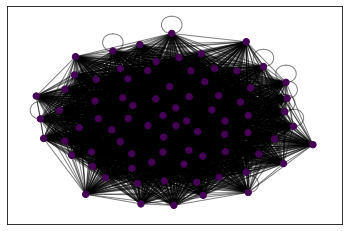

In [ ]:
import community as community_louvain
import community.community_louvain as community_louvain

import matplotlib.cm as cm

partition = community_louvain.best_partition(graph_gb)

pos = nx.spring_layout(graph_gb)
cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
nx.draw_networkx_nodes(graph_gb, pos, partition.keys(), node_size=40,
                       cmap=cmap, node_color=list(partition.values()))
nx.draw_networkx_edges(graph_gb, pos, alpha=0.5)
plt.show()

###2. Voters-Cities Analysis

In [ ]:
read_file = pd.read_excel (r'/content/drive/MyDrive/48002_proj/secmen_son.xlsx')
read_file.to_csv (r'/content/drive/MyDrive/48002_proj/secmen_son.csv', index = None, header=True)

In [ ]:
secmen_df = pd.read_csv('/content/drive/MyDrive/48002_proj/secmen_son.csv')
secmen_df.columns = secmen_df.iloc[0]
secmen_df = secmen_df[1:]
secmen_df

,İl Id,İl Adı,Cezaevi Sandık Sayısı,Toplam Sandık Sayısı,Kayıtlı Seçmen Sayısı,Kadın Seçmen Sayısı,Erkek Seçmen Sayısı,Okuma yazma bilmeyen,Okuma yazma bilen fakat bir okul bitirmeyen,İlkokul,...,30-34,35-39,40-44,45-49,50-54,55-59,60-64,65-69,70-74,75+
1,1.0,ADANA,10.0,4543.0,1524922.0,778832.0,746090.0,68670,83532.0,343516.0,...,163302.0,174395.0,155052.0,137741.0,125836.0,109735.0,91175.0,67714.0,43140.0,56743.0
2,2.0,ADIYAMAN,3.0,1443.0,399281.0,201009.0,198272.0,33756,22754.0,86108.0,...,44878.0,44693.0,37473.0,32886.0,27621.0,22683.0,18799.0,16454.0,11512.0,18060.0
3,3.0,AFYONKARAHİSAR,5.0,1807.0,506851.0,260095.0,246756.0,16665,24681.0,164809.0,...,49961.0,51885.0,45547.0,44175.0,41429.0,41067.0,33837.0,27351.0,19208.0,30900.0
4,4.0,AĞRI,4.0,1107.0,295475.0,143939.0,151536.0,33253,49033.0,65341.0,...,33420.0,33227.0,23910.0,19874.0,17153.0,14322.0,12402.0,8794.0,6365.0,8333.0
5,68.0,AKSARAY,1.0,891.0,266870.0,137167.0,129703.0,14272,12180.0,77422.0,...,28713.0,2963.0,26188.0,23432.0,21117.0,17739.0,14952.0,13404.0,9244.0,12587.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78,65.0,VAN,7.0,2049.0,637867.0,316986.0,320881.0,60695,98303.0,118853.0,...,79113.0,73475.0,52072.0,43802.0,38194.0,29785.0,23076.0,16610.0,10976.0,14364.0
79,77.0,YALOVA,1.0,515.0,178178.0,90692.0,87486.0,4194,5737.0,41747.0,...,16606.0,18160.0,17058.0,16290.0,15137.0,14646.0,12879.0,10035.0,7168.0,10666.0
80,66.0,YOZGAT,5.0,1283.0,296268.0,151850.0,144418.0,15733,16899.0,92344.0,...,26526.0,26821.0,24664.0,24116.0,24940.0,23135.0,21362.0,18837.0,13939.0,19932.0
81,67.0,ZONGULDAK,3.0,1508.0,446863.0,230046.0,216817.0,27778,19555.0,128169.0,...,41457.0,47245.0,44085.0,40583.0,39855.0,40951.0,35975.0,26943.0,17072.0,25205.0


Dropping the irrelevant features that we don't want in our similarity matrix.

In [ ]:
secmen_df_c = secmen_df.drop(['İl Id', 'İl Adı','Cezaevi Sandık Sayısı', 'Toplam Sandık Sayısı','Kayıtlı Seçmen Sayısı','Kadın Seçmen Sayısı',
                              'Erkek Seçmen Sayısı'], axis=1)
secmen_df_c.dropna()

,Okuma yazma bilmeyen,Okuma yazma bilen fakat bir okul bitirmeyen,İlkokul,İlköğretim,Ortaokul veya dengi okul,Lise veya dengi okul,Yüksekokul veya fakülte,18-24,25-29,30-34,35-39,40-44,45-49,50-54,55-59,60-64,65-69,70-74,75+
1,68670,83532.0,343516.0,224568.0,144453.0,395398.0,233369.0,241966.0,158123.0,163302.0,174395.0,155052.0,137741.0,125836.0,109735.0,91175.0,67714.0,43140.0,56743.0
2,33756,22754.0,86108.0,71359.0,37489.0,88093.0,53827.0,78170.0,46052.0,44878.0,44693.0,37473.0,32886.0,27621.0,22683.0,18799.0,16454.0,11512.0,18060.0
3,16665,24681.0,164809.0,85583.0,45306.0,102167.0,58513.0,74411.0,47080.0,49961.0,51885.0,45547.0,44175.0,41429.0,41067.0,33837.0,27351.0,19208.0,30900.0
4,33253,49033.0,65341.0,47613.0,24867.0,43183.0,25420.0,73153.0,44522.0,33420.0,33227.0,23910.0,19874.0,17153.0,14322.0,12402.0,8794.0,6365.0,8333.0
5,14272,12180.0,77422.0,50972.0,24444.0,51428.0,29401.0,42861.0,27004.0,28713.0,2963.0,26188.0,23432.0,21117.0,17739.0,14952.0,13404.0,9244.0,12587.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,6627,15156.0,76588.0,47493.0,23327.0,56813.0,35104.0,34585.0,22710.0,25979.0,27896.0,25790.0,24164.0,22996.0,21720.0,18773.0,14370.0,10411.0,17099.0
78,60695,98303.0,118853.0,124274.0,51030.0,110292.0,64043.0,15732.0,99080.0,79113.0,73475.0,52072.0,43802.0,38194.0,29785.0,23076.0,16610.0,10976.0,14364.0
79,4194,5737.0,41747.0,22279.0,18462.0,48509.0,31492.0,23262.0,16271.0,16606.0,18160.0,17058.0,16290.0,15137.0,14646.0,12879.0,10035.0,7168.0,10666.0
80,15733,16899.0,92344.0,40194.0,26290.0,64351.0,31898.0,45465.0,26531.0,26526.0,26821.0,24664.0,24116.0,24940.0,23135.0,21362.0,18837.0,13939.0,19932.0


Creating the cosine similarity matrix according to the features above. 

In [ ]:
cosine_sim_s  = secmen_df_c
cosine_sim_s.drop([82], axis=0, inplace=True)

In [ ]:
cos_array_m = pairwise_distances(cosine_sim_s,metric='cosine')
cos_array_m

array([[2.22044605e-16, 1.23751188e-02, 2.94325838e-02, ...,
        8.57258707e-03, 2.68135547e-02, 1.75056337e-02],
       [1.23751188e-02, 1.11022302e-16, 3.56871571e-02, ...,
        3.55556297e-02, 3.44565026e-02, 3.50558754e-02],
       [2.94325838e-02, 3.56871571e-02, 1.11022302e-16, ...,
        3.46694447e-02, 4.45358386e-03, 1.11610711e-02],
       ...,
       [8.57258707e-03, 3.55556297e-02, 3.46694447e-02, ...,
        0.00000000e+00, 3.00333826e-02, 1.62616950e-02],
       [2.68135547e-02, 3.44565026e-02, 4.45358386e-03, ...,
        3.00333826e-02, 0.00000000e+00, 7.65150134e-03],
       [1.75056337e-02, 3.50558754e-02, 1.11610711e-02, ...,
        1.62616950e-02, 7.65150134e-03, 0.00000000e+00]])

In [ ]:
graph_s = nx.from_numpy_array(cos_array_m)

In [ ]:
graph_s

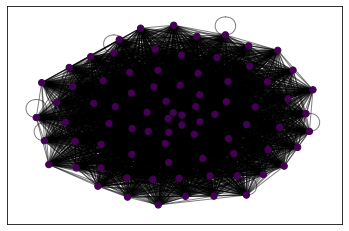

In [ ]:
#COMMUNITY DETECTION
partition = community_louvain.best_partition(graph_s)

pos = nx.spring_layout(graph_s)
cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
nx.draw_networkx_nodes(graph_s, pos, partition.keys(), node_size=40,
                       cmap=cmap, node_color=list(partition.values()))
nx.draw_networkx_edges(graph_s, pos, alpha=0.5)
plt.show()

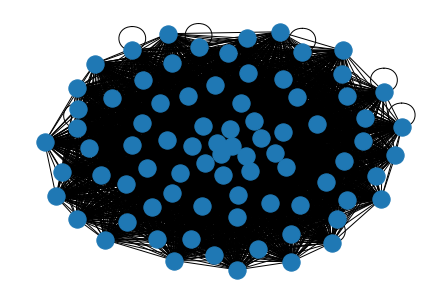

In [ ]:

nx.draw(graph_s)
plt.show()

In [ ]:
nx.write_gexf(graph_s, '/content/drive/MyDrive/cs48002/secmenlerson_n.gexf')

###3. Exploratory Data Analysis

We have selected 3 cities base on their education level. Such cities were selected based on the weighted average of the education levels. Ankara was one of most educated cities while Gaziantep was one of the least educated. So that, they have been added to the analysis subjects. Adana was also one of the cities that had average values of all cities based on the education level. Since calculations were easier in sheets, such calculations directly have been conducted there.

In [ ]:
df_Adana = df_m[df_m['Şehir'] == 'Adana']
df_Antep = df_m[df_m['Şehir'] == 'Gaziantep']
df_Ankara = df_m[df_m['Şehir'] == 'Ankara']


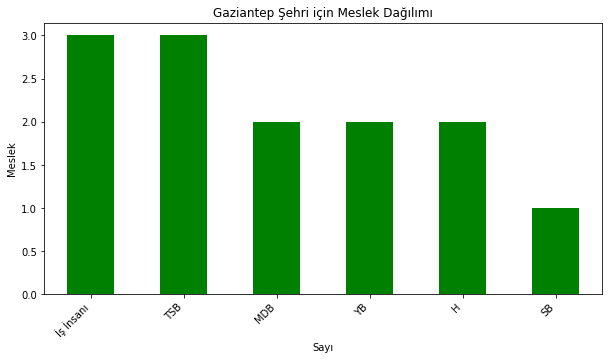

In [ ]:
df_Antep2 = df_m2[df_m2['Şehir'] == 'Gaziantep']
plt.figure(figsize=(10,5))
plt.rcParams.update({'font.size': 10})
df_Antep2['Kategorik Meslek'].value_counts().plot(kind='bar', color = 'g')
plt.xticks(rotation = 45, ha = 'right')
plt.title('Gaziantep Şehri için Meslek Dağılımı')
plt.xlabel('Sayı')
plt.ylabel('Meslek')
plt.show()

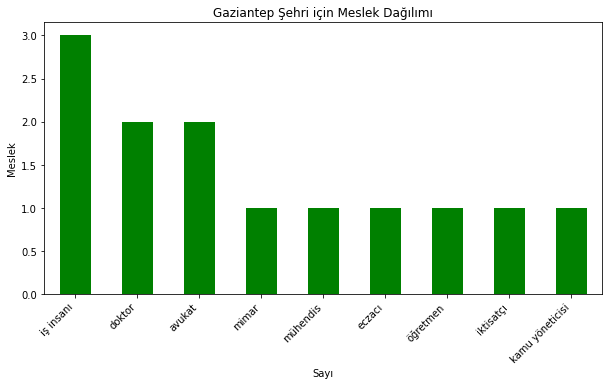

In [ ]:
plt.figure(figsize=(10,5))
plt.rcParams.update({'font.size': 10})
df_Antep.Meslek.value_counts().plot(kind='bar', color = 'g')
plt.xticks(rotation = 45, ha = 'right')
plt.title('Gaziantep Şehri için Meslek Dağılımı')
plt.xlabel('Sayı')
plt.ylabel('Meslek')
plt.show()

Text(0.5, 1.0, 'Milletvekillerinin Doğum Yerleri ve Seçildikleri Şehirler Aynı mı? - Gaziantep')

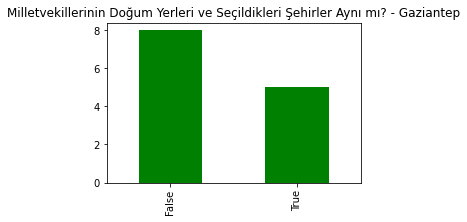

In [ ]:
ig = plt.figure(figsize=(10,10)) 
fig_dims = (3, 2)
plt.rcParams.update({'font.size': 10})
plt.subplot2grid(fig_dims, (0, 0))
df_Antep['farkli_sehir'].value_counts().plot(kind='bar', 
                                     title='Antep',
                                     color = 'g')
plt.title('Milletvekillerinin Doğum Yerleri ve Seçildikleri Şehirler Aynı mı? - Gaziantep')

Text(0.5, 1.0, 'Milletvekillerinin Doğum Yılları - Gaziantep')

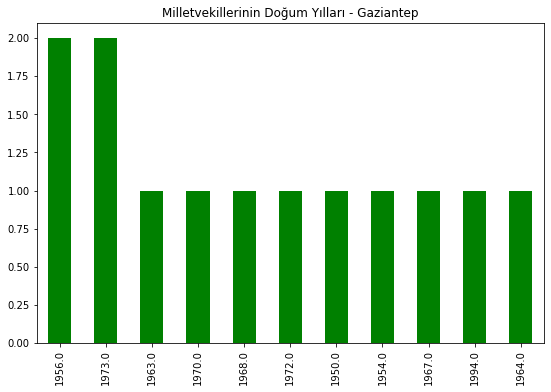

In [ ]:
ig = plt.figure(figsize=(20,20)) 
fig_dims = (3, 2)
plt.rcParams.update({'font.size': 10})
plt.subplot2grid(fig_dims, (0, 0))
df_Antep['Doğum Yılı'].value_counts().plot(kind='bar', 
                                     title='Antep',
                                     color = 'g')
plt.title('Milletvekillerinin Doğum Yılları - Gaziantep')


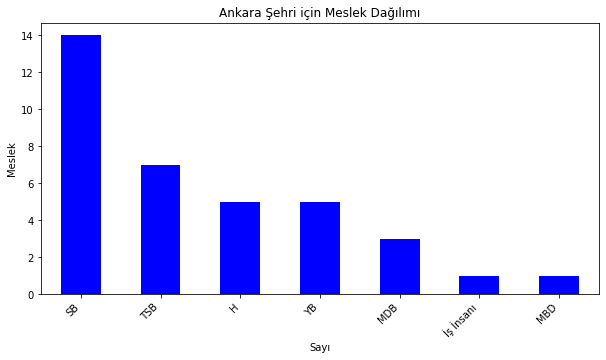

In [ ]:
df_Ankara2 = df_m2[df_m2['Şehir'] == 'Ankara']
plt.figure(figsize=(10,5))
plt.rcParams.update({'font.size': 10})
df_Ankara2['Kategorik Meslek'].value_counts().plot(kind='bar', color = 'b')
plt.xticks(rotation = 45, ha = 'right')
plt.title('Ankara Şehri için Meslek Dağılımı')
plt.xlabel('Sayı')
plt.ylabel('Meslek')
plt.show()

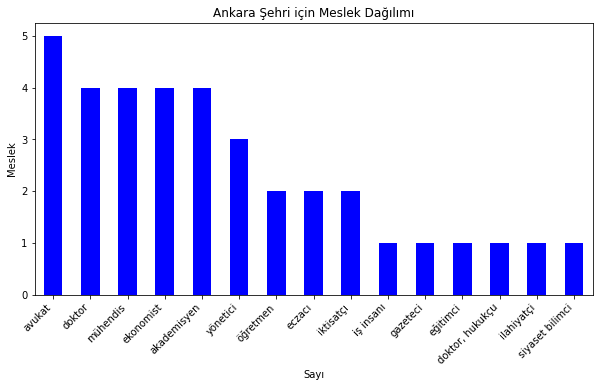

In [ ]:
plt.figure(figsize=(10,5))
plt.rcParams.update({'font.size': 10})
df_Ankara.Meslek.value_counts().plot(kind='bar', color = 'b')
plt.xticks(rotation = 45, ha = 'right')
plt.title('Ankara Şehri için Meslek Dağılımı')
plt.xlabel('Sayı')
plt.ylabel('Meslek')
plt.show()

Text(0.5, 1.0, 'Milletvekillerinin Doğum Yerleri ve Seçildikleri Şehirler Aynı mı? - Ankara')

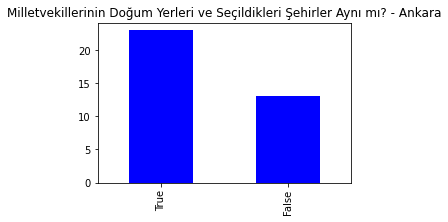

In [ ]:
ig = plt.figure(figsize=(10,10)) 
fig_dims = (3, 2)
plt.rcParams.update({'font.size': 10})
plt.subplot2grid(fig_dims, (0, 0))
df_Ankara['farkli_sehir'].value_counts().plot(kind='bar', 
                                     title='Ankara',
                                     color = 'b')
plt.title('Milletvekillerinin Doğum Yerleri ve Seçildikleri Şehirler Aynı mı? - Ankara')


Text(0.5, 1.0, 'Milletvekillerinin Doğum Yılları - Ankara')

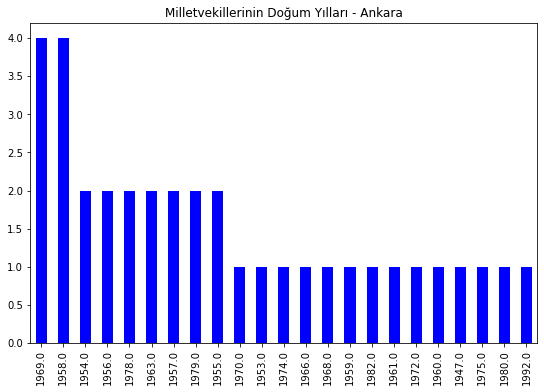

In [ ]:
ig = plt.figure(figsize=(20,20)) 
fig_dims = (3, 2)
plt.rcParams.update({'font.size': 10})
plt.subplot2grid(fig_dims, (0, 0))
df_Ankara['Doğum Yılı'].value_counts().plot(kind='bar', 
                                     title='Ankara',
                                     color = 'b')
plt.title('Milletvekillerinin Doğum Yılları - Ankara')

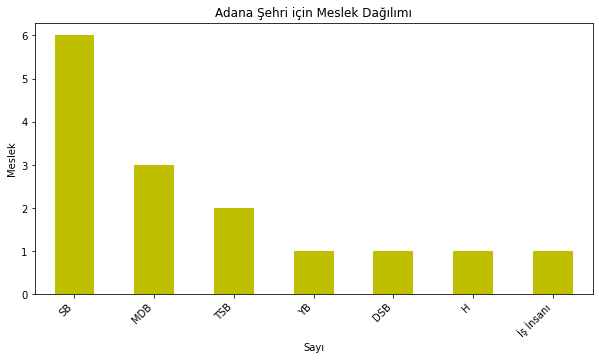

In [ ]:
df_Adana2 = df_m2[df_m2['Şehir'] == 'Adana']
plt.figure(figsize=(10,5))
plt.rcParams.update({'font.size': 10})
df_Adana2['Kategorik Meslek'].value_counts().plot(kind='bar', color = 'y')
plt.xticks(rotation = 45, ha = 'right')
plt.title('Adana Şehri için Meslek Dağılımı')
plt.xlabel('Sayı')
plt.ylabel('Meslek')
plt.show()

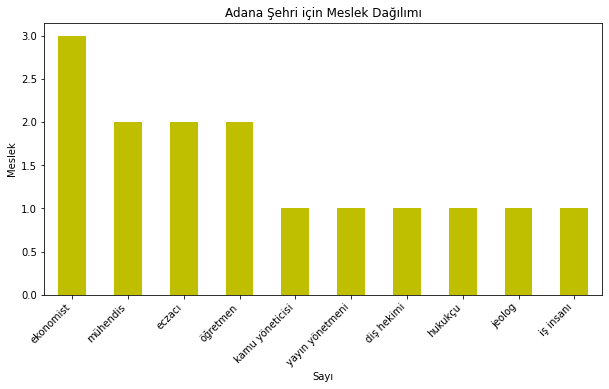

In [ ]:
plt.figure(figsize=(10,5))
plt.rcParams.update({'font.size': 10})
df_Adana.Meslek.value_counts().plot(kind='bar', color = 'y')
plt.xticks(rotation = 45, ha = 'right')
plt.title('Adana Şehri için Meslek Dağılımı')
plt.xlabel('Sayı')
plt.ylabel('Meslek')
plt.show()

Text(0.5, 1.0, 'Milletvekillerinin Doğum Yerleri ve Seçildikleri Şehirler Aynı mı? - Adana')

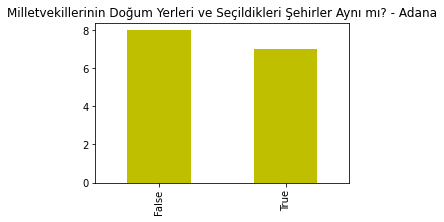

In [ ]:
ig = plt.figure(figsize=(10,10)) 
fig_dims = (3, 2)
plt.rcParams.update({'font.size': 10})
plt.subplot2grid(fig_dims, (0, 0))
df_Adana['farkli_sehir'].value_counts().plot(kind='bar', 
                                     title='Adana',
                                     color = 'y')
plt.title('Milletvekillerinin Doğum Yerleri ve Seçildikleri Şehirler Aynı mı? - Adana')


Text(0.5, 1.0, 'Milletvekillerinin Doğum Yılları - Adana')

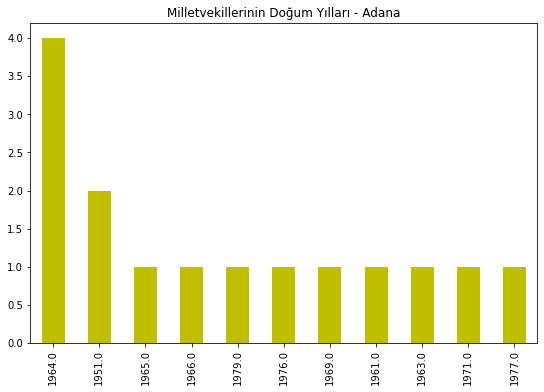

In [ ]:
ig = plt.figure(figsize=(20,20)) 
fig_dims = (3, 2)
plt.rcParams.update({'font.size': 10})
plt.subplot2grid(fig_dims, (0, 0))
df_Adana['Doğum Yılı'].value_counts().plot(kind='bar', 
                                     title='Adana',
                                     color = 'y')
plt.title('Milletvekillerinin Doğum Yılları - Adana')
